#Desarrollo del Taller

# 1. Comprensión del dataset  



In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import keras as Kr
import seaborn as sns

In [335]:
#lecutua del data set y encondig
data_set=pd.read_csv("/content/gender-classifier-DFE-791531.csv", sep=',',encoding='latin')


In [336]:
#revisamos el numero datos no nulos y el tipod e informacion que conrine el data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [337]:
#obtenemos una descripcion de los valors niminos , maximos , desviacione stardar u la media para cada una de las caracteristicas
#obtenidas
data_set.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


<Axes: ylabel='gender:confidence'>

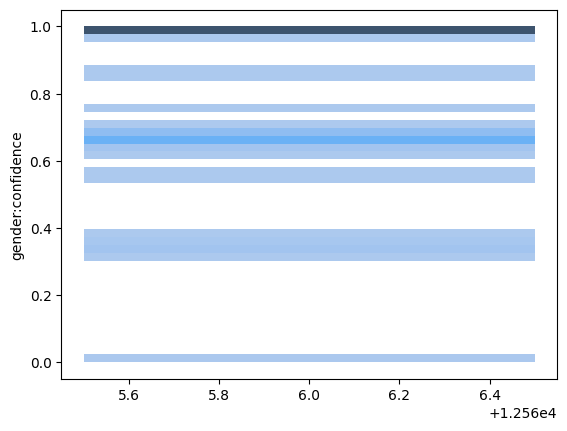

In [338]:
#Observamos al distribuciond de la confiafilidad de los perfiles frente a su ubucacion de origen  del tweet
#como coloca las etiquestas de los nombres de la ubicacion en x
sns.histplot(x=data_set['tweet_location'].count(),y=data_set['gender:confidence'], )

In [339]:
data_set['tweet_location'].head(10)


0         main; @Kan1shk3
1                     NaN
2                  clcncl
3           Palo Alto, CA
4                     NaN
5         New York Gritty
6               Worldwide
7                     NaN
8                     NaN
9    Nottingham, England.
Name: tweet_location, dtype: object

<ipython-input-340-e87ee30dc288>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_lineal_entre_variables=data_set.corr()


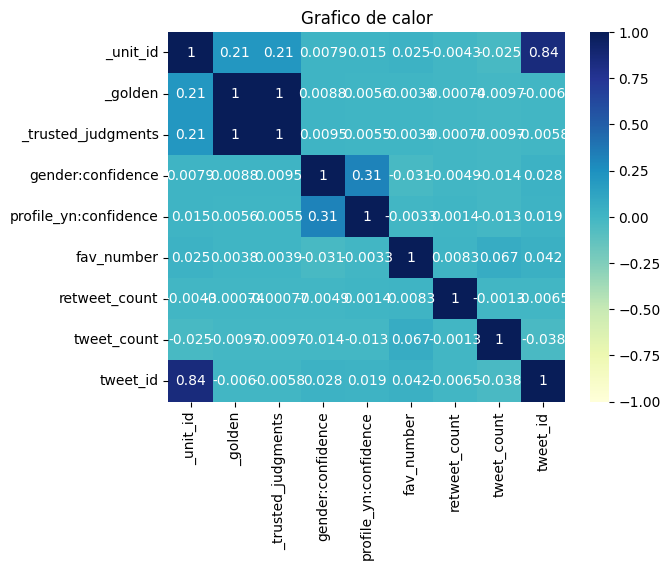

In [340]:
#obtenemos la matriz de correlacion entre las variables y la mostramos por medio de un heatmap para mostrar la correlacion entre las variablres
# asi como su densidad
correlacion_lineal_entre_variables=data_set.corr()
sns.heatmap(correlacion_lineal_entre_variables,annot=True, cmap='YlGnBu',vmin=-1 ,vmax=1)
plt.title('Grafico de calor')
plt.show()

In [341]:
data_set.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## 2.Limpienza de los datos

In [342]:
#Eliminamos variables como los id asi como expresiones temproales que no aportan valorn en la prediccion del genero de la
# persona
# Eliminamos datos como los relacionados con log genreos fuera de hombre y mujer como los brand o no identificados, el
# objetivo es determinar si es hombre o mujer, al alimentar el data set con mas generos no clasificados dentro de estos, con multiples
#categorias representaria una gran cantidad de ruido  que generaria una clasificacion erronean en el ouput que buscmaos por tal
#motivo eliminamos las filas cuyo genero sea brand


In [343]:
data_set.drop(['_unit_id','tweet_id','user_timezone','tweet_coord'],axis=1,inplace=True)

In [344]:
#Eliminaamso als filas en las cuales su gender es distinto de male or female dado que brand es un gnero no util praa predecir el outpude
#tambien se eliminan todos aquellos elementos cuyo bvalor sea unknon
#si es hombre o mujer.
#data_set.drop(data_set[data_set['gender']=='brand'].index,inplace=True)
condicion_de_band=data_set['gender']=='brand'
data_set.drop(data_set[condicion_de_band].index,inplace=True)
data_set['gender']

0          male
1          male
2          male
3          male
4        female
          ...  
20045    female
20046      male
20047      male
20048    female
20049    female
Name: gender, Length: 14108, dtype: object

In [345]:
data_set.columns

Index(['_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at',
       'gender', 'gender:confidence', 'profile_yn', 'profile_yn:confidence',
       'created', 'description', 'fav_number', 'gender_gold', 'link_color',
       'name', 'profile_yn_gold', 'profileimage', 'retweet_count',
       'sidebar_color', 'text', 'tweet_count', 'tweet_created',
       'tweet_location'],
      dtype='object')

In [346]:
#posible primera combianacion para los datos
data_set[['gender','gender:confidence','_golden','_trusted_judgments','profile_yn','profile_yn:confidence']].head(10)

,gender,gender:confidence,_golden,_trusted_judgments,profile_yn,profile_yn:confidence
0,male,1.0000,False,3,yes,1.0
1,male,1.0000,False,3,yes,1.0
2,male,0.6625,False,3,yes,1.0
3,male,1.0000,False,3,yes,1.0
4,female,1.0000,False,3,yes,1.0
5,female,1.0000,False,3,yes,1.0
7,male,1.0000,False,3,yes,1.0
8,female,1.0000,False,3,yes,1.0
9,female,1.0000,False,3,yes,1.0
12,female,0.6509,False,3,yes,1.0


In [347]:
#Evaluamos condicion de datos nulos
data_set.isnull().sum()

_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           36
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               2130
fav_number                   0
gender_gold              14072
link_color                   0
name                         0
profile_yn_gold          14072
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_count                  0
tweet_created                0
tweet_location            4790
dtype: int64

In [348]:
data_set.drop(['_last_judgment_at'],axis=1,inplace=True)

In [349]:
data_set.drop(['created','tweet_created'],axis=1,inplace=True)

In [350]:
#profile iamge ni imagen de perfil  porque no estamos usando analisi de imagen
#description borrarlo como no se esta haciendo npl
data_set.drop(['description','profileimage','text','link_color','tweet_location','name'],axis=1,inplace=True)

In [351]:
data_set.dropna()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,fav_number,gender_gold,profile_yn_gold,retweet_count,sidebar_color,tweet_count
20000,True,golden,249,male,0.9612,yes,0.9612,193,male,yes,0,FFFFFF,3874
20004,True,golden,261,male,1.0000,yes,1.0000,43899,male,yes,0,0,3296
20005,True,golden,247,male,0.7538,yes,1.0000,0,brand,yes,0,C0DEED,2579
20006,True,golden,242,female,0.8503,yes,1.0000,228,female,yes,0,C0DEED,710
20007,True,golden,249,female,1.0000,yes,1.0000,1529,female,yes,0,0,17230
20008,True,golden,256,male,0.8458,yes,1.0000,8894,male,yes,0,C0DEED,11318
20009,True,golden,262,female,1.0000,yes,1.0000,181,female,yes,0,DBE9ED,781
20010,True,golden,259,female,1.0000,yes,1.0000,9041,female,yes,0,0,36755
20012,True,golden,258,male,0.8796,yes,1.0000,835,male,yes,0,C0DEED,934
20013,True,golden,260,male,0.9613,yes,1.0000,105,male,yes,0,FFFFFF,11286


In [352]:
data_set.head(19)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,fav_number,gender_gold,profile_yn_gold,retweet_count,sidebar_color,tweet_count
0,False,finalized,3,male,1.0000,yes,1.0,0,NaN,NaN,0,FFFFFF,110964
1,False,finalized,3,male,1.0000,yes,1.0,68,NaN,NaN,0,C0DEED,7471
2,False,finalized,3,male,0.6625,yes,1.0,7696,NaN,NaN,1,C0DEED,5617
3,False,finalized,3,male,1.0000,yes,1.0,202,NaN,NaN,0,C0DEED,1693
4,False,finalized,3,female,1.0000,yes,1.0,37318,NaN,NaN,0,0,31462
5,False,finalized,3,female,1.0000,yes,1.0,3901,NaN,NaN,0,0,20036
7,False,finalized,3,male,1.0000,yes,1.0,80,NaN,NaN,0,C0DEED,112117
8,False,finalized,3,female,1.0000,yes,1.0,1825,NaN,NaN,0,0,482
9,False,finalized,3,female,1.0000,yes,1.0,3115,NaN,NaN,0,FFFFFF,26085
12,False,finalized,3,female,0.6509,yes,1.0,3371,NaN,NaN,0,FFFFFF,13585


##3.Manejo de variables categoricas

In [353]:
#Manejo de de genders
# male ->1
# female ->0
# unknow se va clasificar dependeiendo de al distribucion de numero de hombres y mujeres y por por el confidence
data_set['gender'].value_counts()

female     6700
male       6194
unknown    1117
Name: gender, dtype: int64

In [354]:
male_distribution=data_set['gender']=='male'
female_distribution=data_set['gender']=='female'
unknow_distribution=data_set['gender']=='unknown'

In [355]:
data_set[male_distribution].describe()

,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count
count,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6.194000e+03
mean,3.839845,0.905113,0.994725,4898.770100,0.088957,3.179642e+04
std,14.409756,0.175139,0.041813,12458.063198,2.064047,8.349996e+04
min,3.000000,0.320600,0.630800,0.000000,0.000000,1.000000e+00
25%,3.000000,1.000000,1.000000,95.000000,0.000000,2.132500e+03
50%,3.000000,1.000000,1.000000,831.500000,0.000000,9.128500e+03
75%,3.000000,1.000000,1.000000,4071.500000,0.000000,3.080425e+04
max,264.000000,1.000000,1.000000,259583.000000,153.000000,2.680199e+06


In [356]:
data_set[female_distribution].describe()

,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6.700000e+03
mean,3.552687,0.926360,0.994947,6008.320149,0.046716,2.728680e+04
std,11.689037,0.155159,0.040888,13679.838005,0.730049,5.630797e+04
min,3.000000,0.322300,0.631000,0.000000,0.000000,1.000000e+00
25%,3.000000,1.000000,1.000000,200.750000,0.000000,2.408000e+03
50%,3.000000,1.000000,1.000000,1509.000000,0.000000,9.459000e+03
75%,3.000000,1.000000,1.000000,5902.000000,0.000000,2.957725e+04
max,274.000000,1.000000,1.000000,341621.000000,49.000000,1.125963e+06


In [357]:
data_set[unknow_distribution].describe()

,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count
count,1117.0,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,3.0,0.631267,0.990170,3708.038496,0.023277,35361.219338
std,0.0,0.183848,0.056413,10442.593095,0.162294,69654.283803
min,3.0,0.327500,0.643000,0.000000,0.000000,1.000000
25%,3.0,0.644400,1.000000,0.000000,0.000000,2370.000000
50%,3.0,0.662800,1.000000,118.000000,0.000000,14378.000000
75%,3.0,0.675500,1.000000,2175.000000,0.000000,43706.000000
max,3.0,1.000000,1.000000,131431.000000,2.000000,884279.000000


In [358]:
data_set.drop(data_set[unknow_distribution].index,inplace=True)

In [359]:
data_set.drop(data_set[data_set['gender_gold']=='brand'].index,inplace=True)
data_set.drop(data_set[data_set['gender_gold']=='unknow'].index,inplace=True)
data_set.drop(data_set[data_set['gender_gold']=='female\nunknown'].index,inplace=True)
data_set.drop(data_set[data_set['gender_gold']=='male\nunknown'].index,inplace=True)

In [360]:
#Eliminaciond de valotrs nulso aplciados al dataset
data_set.dropna(inplace=True)

In [361]:
data_set.head(10)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,fav_number,gender_gold,profile_yn_gold,retweet_count,sidebar_color,tweet_count
20000,True,golden,249,male,0.9612,yes,0.9612,193,male,yes,0,FFFFFF,3874
20004,True,golden,261,male,1.0000,yes,1.0000,43899,male,yes,0,0,3296
20006,True,golden,242,female,0.8503,yes,1.0000,228,female,yes,0,C0DEED,710
20007,True,golden,249,female,1.0000,yes,1.0000,1529,female,yes,0,0,17230
20008,True,golden,256,male,0.8458,yes,1.0000,8894,male,yes,0,C0DEED,11318
20009,True,golden,262,female,1.0000,yes,1.0000,181,female,yes,0,DBE9ED,781
20010,True,golden,259,female,1.0000,yes,1.0000,9041,female,yes,0,0,36755
20012,True,golden,258,male,0.8796,yes,1.0000,835,male,yes,0,C0DEED,934
20013,True,golden,260,male,0.9613,yes,1.0000,105,male,yes,0,FFFFFF,11286
20014,True,golden,242,male,1.0000,yes,1.0000,3870,male,yes,0,0,13886


In [362]:
data_set.shape

(33, 13)

In [363]:
#converiteir en 0 1 male and female
#codificacion hombre o mujer
#si hay dumificacio sino coger solo numericas
#utilizan numeros para predecir
#data_set['gender'].apply(lambda x:x['gender'].replace({'male':1}) if x=='male' else x['gender'].replace({'female':0}))
data_set['gender']=data_set['gender'].replace({'male':1,'female':0})
data_set['gender_gold']=data_set['gender_gold'].replace({'male':1,'female':0})
data_set['_golden']=data_set['_golden'].replace({'True':1,'False':0})


In [364]:
data_set['profile_yn']=data_set['profile_yn'].replace({'yes':1})
data_set['profile_yn_gold']=data_set['profile_yn_gold'].replace({'yes':1})

In [365]:
data_set

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,fav_number,gender_gold,profile_yn_gold,retweet_count,sidebar_color,tweet_count
20000,True,golden,249,1,0.9612,1,0.9612,193,1,1,0,FFFFFF,3874
20004,True,golden,261,1,1.0000,1,1.0000,43899,1,1,0,0,3296
20006,True,golden,242,0,0.8503,1,1.0000,228,0,1,0,C0DEED,710
20007,True,golden,249,0,1.0000,1,1.0000,1529,0,1,0,0,17230
20008,True,golden,256,1,0.8458,1,1.0000,8894,1,1,0,C0DEED,11318
20009,True,golden,262,0,1.0000,1,1.0000,181,0,1,0,DBE9ED,781
20010,True,golden,259,0,1.0000,1,1.0000,9041,0,1,0,0,36755
20012,True,golden,258,1,0.8796,1,1.0000,835,1,1,0,C0DEED,934
20013,True,golden,260,1,0.9613,1,1.0000,105,1,1,0,FFFFFF,11286
20014,True,golden,242,1,1.0000,1,1.0000,3870,1,1,0,0,13886


In [366]:
data_set['sidebar_color']

20000    FFFFFF
20004         0
20006    C0DEED
20007         0
20008    C0DEED
20009    DBE9ED
20010         0
20012    C0DEED
20013    FFFFFF
20014         0
20015    EEEEEE
20018    BDDCAD
20019    FFFFFF
20021    FFFFFF
20022         0
20026         0
20027    C0DEED
20028         0
20031    C0DEED
20032    C0DEED
20033         0
20035    FFFFFF
20036    C0DEED
20037    FFFFFF
20039    C0DEED
20040         0
20043    5ED4DC
20044    C0DEED
20045    C0DEED
20046         0
20047    C0DEED
20048         0
20049    C0DEED
Name: sidebar_color, dtype: object

In [367]:
data_set[data_set['sidebar_color']==' 5ED4DC'].count()
# para tratar la variables de color lo que hicimos fur remmplazarlas por la
#frecuencia de su ocurrencia
data_set['sidebar_color']=data_set['sidebar_color'].replace({'C0DEED':12,'5ED4DC':1,'0':11,'FFFFFF':6,'EEEEEE':1,'BDDCAD':1 , '5ED4DC':1 ,'DBE9ED':1})

In [368]:
#Codificamos las variables dentro de  golden como 1 y 0
#donde golden es 1 y otra coasa es  0
# lo mismo aplica para las de True or False
# True es 1 y False es 0
data_set['_golden']=data_set['_golden'].replace({'True':1})
data_set['_unit_state']=data_set['_unit_state'].replace({'golden':1})

In [371]:
data_set.columns

Index(['_golden', '_unit_state', '_trusted_judgments', 'gender',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence',
       'fav_number', 'gender_gold', 'profile_yn_gold', 'retweet_count',
       'sidebar_color', 'tweet_count'],
      dtype='object')

In [374]:
#Creacion del data set de entrada par alas pruebas
data_set_neuronas=data_set[['_unit_state', '_trusted_judgments', 'gender',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence',
       'fav_number', 'gender_gold', 'profile_yn_gold', 'retweet_count',
       'sidebar_color', 'tweet_count']]

In [375]:
data_set_neuronas

,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,fav_number,gender_gold,profile_yn_gold,retweet_count,sidebar_color,tweet_count
20000,1,249,1,0.9612,1,0.9612,193,1,1,0,6,3874
20004,1,261,1,1.0000,1,1.0000,43899,1,1,0,11,3296
20006,1,242,0,0.8503,1,1.0000,228,0,1,0,12,710
20007,1,249,0,1.0000,1,1.0000,1529,0,1,0,11,17230
20008,1,256,1,0.8458,1,1.0000,8894,1,1,0,12,11318
20009,1,262,0,1.0000,1,1.0000,181,0,1,0,1,781
20010,1,259,0,1.0000,1,1.0000,9041,0,1,0,11,36755
20012,1,258,1,0.8796,1,1.0000,835,1,1,0,12,934
20013,1,260,1,0.9613,1,1.0000,105,1,1,0,6,11286
20014,1,242,1,1.0000,1,1.0000,3870,1,1,0,11,13886



## 5. Construcción del dataset

**¿Qué diferencia hay en usar un conjunto de validación?**
Muchos modelos son *propensos* a un problema llamado sobreajuste que es cuando el modelo se ajusta tan bien a los datos de entrenamiento que no se generaliza bien a los nuevos datos. El signo revelador del sobreajuste es un modelo que funciona extremadamente bien con los datos de entrenamiento y su rendimiento es inferior con nuevos datos. La forma de tener esto en cuenta es dividir el conjunto de datos en varios conjuntos: un conjunto de entrenamiento para entrenar el modelo, un conjunto de validación para comparar el rendimiento de diferentes modelos y un conjunto de prueba final para comprobar cómo funcionará el modelo en el mundo real.



**¿Mejora los resultados en la construcción del modelo usar un conjunto de
validación?**

No mejora los resultados pero nos permite hacer ajustes al modelo como la tasa de aprendizaje o el numero de iteraciones de esta forma optimizando su rendimiento.



**¿Qué información provee el uso de un conjunto de validación?**

El conjunto de validación afecta a un modelo, pero sólo indirectamente por lo que no provee informac[i](https://)on.

Bibliografia:

https://datos.gob.es/es/blog/como-preparar-un-conjunto-de-datos-para-machine-learning-y-analisis

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [378]:
data_set_neuronas.columns

Index(['_unit_state', '_trusted_judgments', 'gender', 'gender:confidence',
       'profile_yn', 'profile_yn:confidence', 'fav_number', 'gender_gold',
       'profile_yn_gold', 'retweet_count', 'sidebar_color', 'tweet_count'],
      dtype='object')

In [381]:
# Seleccionar las características de entrada
X = data_set_neuronas[['_unit_state', '_trusted_judgments', 'gender:confidence',
       'profile_yn', 'profile_yn:confidence', 'fav_number', 'gender_gold',
       'profile_yn_gold', 'retweet_count', 'sidebar_color', 'tweet_count']].values
# Seleccionar la variable objetivo
y = data_set_neuronas['gender'].values

## 6. Elaboración del modelo

## 6.1. Perceptron (SE DEBE CAMBIAR X Y Y, EN ESTE CASO SOLO X)

In [386]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Distribucion de data recalcular,
#cambiar manejod e data comparaciion

# Entrenar el perceptrón
perceptron = Perceptron(max_iter=1000, eta0=0.01)
perceptron.fit(X, y)

# Predecir las etiquetas
y_pred_1 = perceptron.predict(X)

# Calcular la matriz de confusión
matriz_confusion_1 = confusion_matrix(y, y_pred_1)

# Calcular las métricas de evaluación
precision_1 = precision_score(y, y_pred_1)
recall_1 = recall_score(y, y_pred_1)
f1_1 = f1_score(y, y_pred_1)

In [383]:
precision_1

0.5806451612903226

In [384]:
recall_1

0.9473684210526315

In [385]:
y_pred_1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

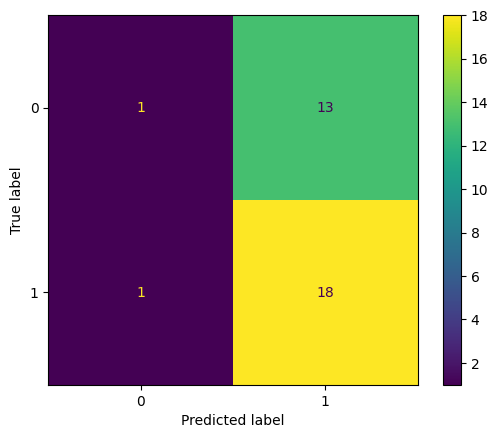

In [388]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_1, display_labels=perceptron.classes_)
disp.plot()
plt.show()

## 6.2. Red Neuronal con una capa oculta con un numero de neurona igual al numero de entradas

In [398]:
from sklearn.neural_network import MLPClassifier

# Entrenar la red neuronal, activation default='relu'
mlp = MLPClassifier(hidden_layer_sizes=(X.shape[1],), max_iter=1000, solver='adam')
mlp.fit(X, y)

# Predecir las etiquetas
y_pred_2 = mlp.predict(X)

# Calcular la matriz de confusión
matriz_confusion_2 = confusion_matrix(y, y_pred_2)

# Calcular las métricas de evaluación
precision_2 = precision_score(y, y_pred_2)
recall_2 = recall_score(y, y_pred_2)
f1_2 = f1_score(y, y_pred_2)

## 6.3. Red Neuronal con dos capas ocultas, la primera con las mitad de las entradas y la segunda con la misma cantidad de la capa oculta, la tercera capa sera la de salida solo usar librerias Scikit-learn, TensorFlow y Keras.

In [392]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test_3 = train_test_split(X, y,train_size=0.6,test_size=0.4, random_state=42)

# Definir la arquitectura de la red neuronal
model = Sequential()

# Primera capa oculta
model.add(Dense(X_train.shape[1] // 2, activation='relu', input_shape=(X_train.shape[1],)))

# Segunda capa oculta
model.add(Dense(X_train.shape[1] // 2, activation='relu'))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100)

# Predecir las etiquetas
y_pred_3 = model.predict(X_test)


# Calcular las métricas de evaluación
precision_3 = precision_score(y_test_3, y_pred_3)
recall_3 = recall_score(y_test_3, y_pred_3)
f1_3 = f1_score(y_test_3, y_pred_3)

Epoch 1/100
1/1 [==============================] - 1s 749ms/step - loss: 533.4431 - accuracy: 0.5263
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 520.8940 - accuracy: 0.5263
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 508.3165 - accuracy: 0.5263
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 495.7098 - accuracy: 0.5263
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 482.9718 - accuracy: 0.5263
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 470.1892 - accuracy: 0.5263
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 457.3717 - accuracy: 0.5263
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 444.5190 - accuracy: 0.5263
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 431.6308 - accuracy: 0.5263
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 418.7065 - accuracy: 0.526

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [394]:
# Calcular la matriz de confusión
matriz_confusion_3 = confusion_matrix(y, y_pred_3)

ValueError: Found input variables with inconsistent numbers of samples: [33, 14]

## 7. Analisis de Resultados

7.1 Analisis Perceptron

In [395]:
# Imprimir la matriz de confusión
print(f"Matriz de confusión:\n{matriz_confusion_1}")

# Imprimir las métricas de evaluación
print(f"Precisión: {accuracy_score(y, y_pred_1):.2f}")
print(f"Precisión: {precision_1:.2f}")
print(f"Recuperación: {recall_1:.2f}")
print(f"F1 Score: {f1_1:.2f}")

Matriz de confusión:
[[ 1 13]
 [ 1 18]]
Precisión: 0.58
Precisión: 0.58
Recuperación: 0.95
F1 Score: 0.72


7.2 Analisis Red Neuronal

In [399]:
# Imprimir la matriz de confusión
print(f"Matriz de confusión:\n{matriz_confusion_2}")

# Imprimir las métricas de evaluación
print(f"Precisión: {accuracy_score(y, y_pred_2):.2f}")
print(f"Precisión: {precision_2:.2f}")
print(f"Recuperación: {recall_2:.2f}")
print(f"F1 Score: {f1_2:.2f}")

Matriz de confusión:
[[ 0 14]
 [ 0 19]]
Precisión: 0.58
Precisión: 0.58
Recuperación: 1.00
F1 Score: 0.73


7.3 Analisis Red Neuronal Multicapa

In [397]:
# Imprimir la matriz de confusión
print(f"Matriz de confusión:\n{matriz_confusion_3}")

# Imprimir las métricas de evaluación
print(f"Precisión: {accuracy_score(y_test_3, y_pred_3):.2f}")
print(f"Precisión: {precision_3:.2f}")
print(f"Recuperación: {recall_3:.2f}")
print(f"F1 Score: {f1_3:.2f}")

NameError: name 'matriz_confusion_3' is not defined

## 8. Ajustes

#Documentacion adicional sobre ejemplos de pandas

In [ ]:
data_set.head(2)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_location,user_timezone
0,False,finalized,3,male,1.0,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,main; @Kan1shk3,Chennai
1,False,finalized,3,male,1.0,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,NaN,Eastern Time (US & Canada)


##Consultas condicionales

In [ ]:
confidence_menora1=data_set['gender:confidence']<=1.0
confidence_mayora0=data_set['gender:confidence']>0.0

In [ ]:
data_set[confidence_menora1 & confidence_mayora0]

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_location,user_timezone
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,main; @Kan1shk3,Chennai
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,NaN,Eastern Time (US & Canada)
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,clcncl,Belgrade
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,"Palo Alto, CA",Pacific Time (US & Canada)
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,True,golden,259,female,1.0000,yes,1.0,(rp),302,female,0084B4,capuletrosa,yes,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,Verona ªÁ,NaN
20046,True,golden,248,male,1.0000,yes,1.0,"Whatever you like, it's not a problem at all. ...",2513,male,CFB929,BenNight41,yes,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,13523,"Kansas City, MO",NaN
20047,True,golden,264,male,1.0000,yes,1.0,#TeamBarcelona ..You look lost so you should f...,50,male,0084B4,realuzzyfluxz,yes,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,26419,Lagos Nigeria,NaN
20048,True,golden,250,female,0.8489,yes,1.0,Anti-statist; I homeschool my kids. Aspiring t...,70804,female,9266CC,argumatronic,yes,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,56073,Texas Hill Country,NaN


In [ ]:
# para negar una condicion usamos la sigueinte verduliña `~
data_set[~(confidence_menora1 & confidence_mayora0)]

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_location,user_timezone
109,False,finalized,3,NaN,0.0,no,0.6581,Always Be Grateful Of Everything You Have Say...,23,NaN,FA743E,yananaShFt,NaN,https://pbs.twimg.com/profile_images/622656047...,0,0,@jaehyunim_ ohh okay..just asking for my frien...,3818,¤Êö«ÜÏ¥ã,Kuala Lumpur
137,False,finalized,3,NaN,0.0,no,0.6716,"- Porque Diablos Nos Confiamos, Porque Diablos...",7351,NaN,38543,_Weed_BobMarley,NaN,https://pbs.twimg.com/profile_images/647125019...,0,0,La Leccion- The 5 Love,27871,#AtleticoNacional.,Central Time (US & Canada)
496,False,finalized,3,NaN,NaN,no,1.0000,amo a cor ÛÏmarromÛ pq de tras pra frente e...,547,NaN,123456,lesbalren,NaN,https://pbs.twimg.com/profile_images/654407508...,0,FFFFFF,can we both say the words and forget this?,60787,6-Feb,Brasilia
582,False,finalized,3,NaN,0.0,no,0.6552,Qiziqarli tvitlarimni o'qishni istaysizmi? Do ...,1,NaN,C8CF9C,uzsanjarbek,NaN,https://pbs.twimg.com/profile_images/464354128...,0,344032,"Quote of the Day: ""I feel like this is my last...",692281,"Tashkent, Uzbekistan",Tashkent
679,False,finalized,3,NaN,0.0,no,0.6574,ÛÛÛÛÛÛÛ¯£¯Âôã ¯£ô ¯¢ ¯¡ôãôôÄ ¯¢...,30,NaN,0084B4,angelomike79,NaN,https://pbs.twimg.com/profile_images/582574334...,0,C0DEED,Growing and engaging with the right tweeps - g...,952,Û_5209F38A ÛÜô,Baghdad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18524,False,finalized,3,NaN,NaN,no,1.0000,ÊÛ ÊÛÊÛ le bitches squad cla sauce dmes ÊÛ...,2852,NaN,0084B4,14voidlahey,NaN,https://pbs.twimg.com/profile_images/658737348...,0,C0DEED,@zquady ilysm pls pick me im so close to my go...,7894,NaN,Pacific Time (US & Canada)
18700,False,finalized,3,NaN,0.0,no,0.6904,No hay derecho. Exijo un final feliz.,15600,NaN,ABB8C2,Omaaaaaaar,NaN,https://pbs.twimg.com/profile_images/565856049...,0,FFFFFF,And it's just like honey when your love comes ...,103209,"Maracaibo, Venezuela.",Caracas
18840,False,finalized,3,NaN,NaN,no,1.0000,14|Claw|I run with a sub but fat people dont|D...,2371,NaN,0084B4,Fluxx_Destiny,NaN,https://pbs.twimg.com/profile_images/654772836...,0,C0DEED,@ABlaze_RN @Fluent_OE @exiLe_MonsteH who are u...,4003,NaN,Pacific Time (US & Canada)
19773,False,finalized,3,NaN,0.0,no,0.6637,PE en CM2. TBI et classe mobile. En pleine rÌ©...,89,NaN,0084B4,Babebybobu1,NaN,https://pbs.twimg.com/profile_images/542096047...,0,C0DEED,Just Pinned to Anglais: reading color words an...,508,Bretagne,NaN


In [ ]:
#Como aplicar filtros de texto para cosultas dentro de una columnas
data_set[data_set['description'].str.contains('Nunca',na=False)]

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_location,user_timezone
9288,False,finalized,3,NaN,0.0,no,0.6757,Nunca se endireitou.,3938,NaN,1C1C1C,caIl97,NaN,https://pbs.twimg.com/profile_images/658710015...,0,FFFFFF,IÛªm ready to engage with my 118 new follower...,35453,"Belo Horizonte, Minas Gerais",Mid-Atlantic
19842,False,finalized,3,NaN,0.0,no,0.6512,"Nunca supe como se sentÌ_a ser fuerte, hasta q...",0,NaN,0084B4,SofiaSuarez_0,NaN,https://pbs.twimg.com/profile_images/640987533...,0,C0DEED,Brothers and sisters :D,503,NaN,NaN


##Funciones Principales de pandas

In [ ]:
#info sirve para savere el tipod de datos que se esta manejando
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14108 entries, 0 to 20049
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                14108 non-null  bool   
 1   _unit_state            14108 non-null  object 
 2   _trusted_judgments     14108 non-null  int64  
 3   gender                 14011 non-null  object 
 4   gender:confidence      14082 non-null  float64
 5   profile_yn             14108 non-null  object 
 6   profile_yn:confidence  14108 non-null  float64
 7   description            11978 non-null  object 
 8   fav_number             14108 non-null  int64  
 9   gender_gold            36 non-null     object 
 10  link_color             14108 non-null  object 
 11  name                   14108 non-null  object 
 12  profile_yn_gold        36 non-null     object 
 13  profileimage           14108 non-null  object 
 14  retweet_count          14108 non-null  int64  
 15  si

In [ ]:
data_set.describe()

,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count
count,14108.000000,14082.000000,14108.000000,14108.000000,14108.000000,1.410800e+04
mean,3.631202,0.888937,0.992829,5339.517153,0.063935,2.998643e+04
std,12.493776,0.194050,0.048507,13138.186820,1.461016,7.088936e+04
min,3.000000,0.000000,0.630800,0.000000,0.000000,1.000000e+00
25%,3.000000,0.681900,1.000000,102.000000,0.000000,2.275250e+03
50%,3.000000,1.000000,1.000000,1024.000000,0.000000,9.565500e+03
75%,3.000000,1.000000,1.000000,4728.500000,0.000000,3.178725e+04
max,274.000000,1.000000,1.000000,341621.000000,153.000000,2.680199e+06


In [ ]:
data_set.memory_usage(deep=True)

Index                     112864
_golden                    14108
_unit_state               931020
_trusted_judgments        112864
gender                    874526
gender:confidence         112864
profile_yn                846383
profile_yn:confidence     112864
description              2001587
fav_number                112864
gender_gold               452547
link_color                885873
name                      960572
profile_yn_gold           452464
profileimage             1880268
retweet_count             112864
sidebar_color             874029
text                     2547503
tweet_count               112864
tweet_location            851703
user_timezone             837915
dtype: int64

In [ ]:
#para determianar o contar el numero de de vecees que aparece dfia info del label
data_set['fav_number'].value_counts()

0        1054
1         188
2         128
3         111
4          83
         ... 
3517        1
5493        1
20571       1
7456        1
2462        1
Name: fav_number, Length: 6241, dtype: int64

In [ ]:
#para eliminar dupplicadosd del dataframe usar drop_duplicates
data_set.drop_duplicates()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_location,user_timezone
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,main; @Kan1shk3,Chennai
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,NaN,Eastern Time (US & Canada)
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,clcncl,Belgrade
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,"Palo Alto, CA",Pacific Time (US & Canada)
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,True,golden,259,female,1.0000,yes,1.0,(rp),302,female,0084B4,capuletrosa,yes,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,Verona ªÁ,NaN
20046,True,golden,248,male,1.0000,yes,1.0,"Whatever you like, it's not a problem at all. ...",2513,male,CFB929,BenNight41,yes,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,13523,"Kansas City, MO",NaN
20047,True,golden,264,male,1.0000,yes,1.0,#TeamBarcelona ..You look lost so you should f...,50,male,0084B4,realuzzyfluxz,yes,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,26419,Lagos Nigeria,NaN
20048,True,golden,250,female,0.8489,yes,1.0,Anti-statist; I homeschool my kids. Aspiring t...,70804,female,9266CC,argumatronic,yes,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,56073,Texas Hill Country,NaN


## uso de grupbys '[agupamientos]'

In [ ]:
# agrupamiento por caracteristicas o sciertas columnas en especifico
# quiero saber que tan comumne son los registro por pais , ejemplo cuantos hay por pais
data_set.groupby('tweet_location').count()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,user_timezone
tweet_location,,,,,,,,,,,,,,,,,,,
,6,6,6,6,6,6,6,6,6,0,6,6,0,6,6,6,6,6,2
ª_ ªÁ ª¢ ª¤,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1
"ts,ed,1d",1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1
Delaware,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1
#B2BHOUR å© Ïä,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ìÙGë±Gë±lÌ¢_üdië±÷¨4 Fë±_üsÏ,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1
ô ¯¤¯øô_ ¯¤ôãô ¯µôÔ¯±.,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
ôÉ,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1


In [ ]:
data_set.groupby('gender').count()

,_golden,_unit_state,_trusted_judgments,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_location,user_timezone
gender,,,,,,,,,,,,,,,,,,,
female,6700,6700,6700,6700,6700,6700,5725,6700,15,6700,6700,15,6700,6700,6700,6700,6700,4278,4353
male,6194,6194,6194,6194,6194,6194,5469,6194,21,6194,6194,21,6194,6194,6194,6194,6194,4469,4144
unknown,1117,1117,1117,1117,1117,1117,702,1117,0,1117,1117,0,1117,1117,1117,1117,1117,516,532


In [ ]:
data_set.groupby('gender').sum()

<ipython-input-43-d3e507eff8dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_set.groupby('gender').sum()


,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count
gender,,,,,,,
female,15,23803,6206.6126,6666.1424,40255745,313,182821554
male,21,23784,5606.2718,6161.3288,30342982,551,196947006
unknown,0,3351,705.1248,1106.0194,4141879,26,39498482


In [ ]:
data_set.groupby('gender').sum().reset_index()

<ipython-input-44-ea50022127b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_set.groupby('gender').sum().reset_index()


,gender,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count
0,female,15,23803,6206.6126,6666.1424,40255745,313,182821554
1,male,21,23784,5606.2718,6161.3288,30342982,551,196947006
2,unknown,0,3351,705.1248,1106.0194,4141879,26,39498482


##Unificacion por Concat

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.DataFrame({'A':['A0', 'A1', 'A2','A3'],
        'B':['B0', 'B1', 'B2','B3'],
	'C':['C0', 'C1', 'C2','C3'],
	'D':['D0', 'D1', 'D2','D3']})


df2 = pd.DataFrame({'A':['A4', 'A5', 'A6','A7'],
	'B':['B4', 'B5', 'B6','B7'],
	'C':['C4', 'C5', 'C6','C7'],
	'D':['D4', 'D5', 'D6','D7']})

In [ ]:
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [ ]:
pd.concat([df1,df2], axis = 1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


##Unificacion de datafram (merge-join)

In [ ]:
#Ejemplos con el merge

In [ ]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})

In [ ]:
#Unir el darafram de der con izq
izq.merge(der)

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [ ]:
#MERGE 2
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2','k3'],
 'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})

In [ ]:
#Hay diferencias entre algunas columnas, por esa razón hay que separarlos de esta manera:
izq.merge(der, left_on = 'key', right_on='key_2')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,k3,C3,D3


In [ ]:
#MERGE 3
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2',np.nan],
 'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})

In [ ]:
#Si tenemos un NaNen nuestro DataFrame, pandas no lo detectará como un mach. Se soluciona con How, dando así, una preferencia.
izq.merge(der, left_on = 'key', right_on='key_2', how='left')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN


##JOIN-INDEXMATCH

In [ ]:
#Join Es otra herramienta para hacer exactamente lo mismo, una combinación. La diferencia es que join va a ir a los índices y no a columnas específicas.
izq = pd.DataFrame({'A': ['A0','A1','A2'],
  'B':['B0','B1','B2']},
  index=['k0','k1','k2'])

der =pd.DataFrame({'C': ['C0','C1','C2'],
  'D':['D0','D1','D2']},
  index=['k0','k2','k3'])

In [ ]:
#Combinamos izq con der
izq.join(der)

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [ ]:
#Traer todos los datos aunque no hagan match.
izq.join(der, how = 'outer')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2


In [ ]:
izq.join(der, how = 'inner')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1


##Pivot_Table

In [ ]:
'''Esta función puede traer recuerdos a las personas interesadas en el mundo del SQL, ya que Oracle, PostgreSQL y otros motores de bases de datos la tienen implementada desde hace muchos años. Pivot, básicamente, transforma los valores de determinadas columnas o filas en los índices de un nuevo DataFrame, y la intersección de estos es el valor resultante.

Entiendo que esto puede sonar algo confuso, pero no te preocupes, todo queda mucho más claro con un ejemplo.

Para comenzar, crea un nuevo Jupyter Notebooks, puedes usar Google Colab o la notebook de tu preferencia que estés utilizando para este curso.

Carga el DataFrame que hemos usado en el curso:'''
df_books = pd.read_csv('/content/gender-classifier-DFE-791531.csv',sep=',',header=0,encoding='latin-1')

In [ ]:
#Explorando las primeas 5 filas
df_books.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
#Aplica pivot_table:
df_books.pivot_table(index='gender',columns='_trusted_judgments',values='gender:confidence')

_trusted_judgments,3,212,227,228,231,233,235,237,239,240,...,258,259,260,261,262,264,270,271,273,274
gender,,,,,,,,,,,,,,,,,,,,,
brand,0.868178,0.6364,NaN,NaN,NaN,0.6059,0.554,0.8397,NaN,NaN,...,NaN,NaN,1.00000,NaN,NaN,0.9818,NaN,0.9622,1.0,NaN
female,0.926304,NaN,1.0,0.765,NaN,NaN,NaN,NaN,0.8431,NaN,...,NaN,1.0,NaN,NaN,1.0,0.9622,1.0,NaN,NaN,1.0
male,0.904981,NaN,NaN,NaN,1.0,NaN,1.000,NaN,NaN,1.0,...,0.8796,1.0,0.98065,1.0,NaN,1.0000,NaN,NaN,NaN,NaN
unknown,0.631267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_books.pivot_table(index='gender',columns='_trusted_judgments',values='gender:confidence',aggfunc=['min','max'])

min                                                  \
_trusted_judgments     3       212  227    228  231     233    235     237   
gender                                                                       
brand               0.3140  0.6364  NaN    NaN  NaN  0.6059  0.554  0.8397   
female              0.3223     NaN  1.0  0.765  NaN     NaN    NaN     NaN   
male                0.3206     NaN  NaN    NaN  1.0     NaN  1.000     NaN   
unknown             0.3275     NaN  NaN    NaN  NaN     NaN    NaN     NaN   

                                 ...     max                                   \
_trusted_judgments     239  240  ...     258  259  260  261  262     264  270   
gender                           ...                                            
brand                  NaN  NaN  ...     NaN  NaN  1.0  NaN  NaN  1.0000  NaN   
female              0.8431  NaN  ...     NaN  1.0  NaN  NaN  1.0  0.9622  1.0   
male                   NaN  1.0  ...  0.8796  1.0  1.0  1.0  NaN  1.0000  NaN   
unknown                NaN  NaN  ...     NaN  NaN  NaN  NaN  NaN     NaN  NaN   

                                      
_trusted_judgments     271  273  274  
gender                                
brand               0.9622  1.0  NaN  
female                 NaN  NaN  1.0  
male                   NaN  NaN  NaN  
unknown                NaN  NaN  NaN  

[4 rows x 64 columns]

##MELT

In [ ]:
'''El método melt toma las columnas del DataFrame y las pasa a filas, con dos nuevas columnas para especificar la antigua columna y el valor que traía.

Por ejemplo, simplemente al imprimir las cinco primeras filas del DataFrame con las columnas de Name y Genre se tiene este resultado.'''

In [ ]:
df_books[['gender','_golden']].head(5)

,gender,_golden
0,male,False
1,male,False
2,male,False
3,male,False
4,female,False


In [ ]:
#Aplica melt de la siguiente manera:
df_books[['gender','_golden']].head(5).melt()

,variable,value
0,gender,male
1,gender,male
2,gender,male
3,gender,male
4,gender,female
5,_golden,False
6,_golden,False
7,_golden,False
8,_golden,False
9,_golden,False


In [ ]:
#Ahora cada resultado de las dos columnas pasa a una fila de este modo a tipo llave:valor.

In [ ]:
df_books.melt(id_vars='_last_judgment_at',value_vars='Genre')

,_last_judgment_at,variable,value
0,10/26/15 23:24,user_timezone,Chennai
1,10/26/15 23:30,user_timezone,Eastern Time (US & Canada)
2,10/26/15 23:33,user_timezone,Belgrade
3,10/26/15 23:10,user_timezone,Pacific Time (US & Canada)
4,10/27/15 1:15,user_timezone,NaN
...,...,...,...
20045,NaN,user_timezone,NaN
20046,NaN,user_timezone,NaN
20047,NaN,user_timezone,NaN
20048,NaN,user_timezone,NaN
